1. Загружаем из наборов данных Scikit-learn breast cancer wisconsin dataset размерностью 30:
2. Загружаем в отдельные переменные входные и выходные данные:

In [49]:
from sklearn.datasets import load_breast_cancer

data_full, target = load_breast_cancer(return_X_y=True)
data = data_full[:, :30]

Реализуем метод главных компонент в функции:

In [50]:
import numpy as np

def pca(X, k):
    # Нормализуем данные
    X_norm = X - X.mean(axis=0)
    
    # Построим матрицу ковариации
    cov_matrix = np.cov(X_norm.T)
    
    # Диагонализируем матрицу
    diagvalues, diagvectors = np.linalg.eig(cov_matrix)
    
    # Отсортируем векторы
    idx = np.argsort(diagvalues)[::-1]
    diagvalues = diagvalues[idx]
    diagvectors = diagvectors[:, idx]
    
    # Оставим k главных компонент
    diagvectors = diagvectors[:, :k]
    
    # Модифицируем исходные нормализованные данные
    X_pca = np.dot(X_norm, diagvectors)
    
    return X_pca

Загружаем те же данные во встроенную в Scikit-learn реализацию метода главных компонент:

In [51]:
from sklearn.decomposition import PCA
pca_sklearn = PCA(n_components=30)
X_pca_sklearn = pca_sklearn.fit_transform(data)
X_pca = pca(data, k=30)

Сравниваем результаты нашей реализации и готовой:

In [52]:
X_pca

array([[ 1.16014257e+03, -2.93917544e+02,  4.85783976e+01, ...,
         1.29334919e-03, -1.98910417e-03,  7.04378359e-04],
       [ 1.26912244e+03,  1.56301818e+01, -3.53945342e+01, ...,
        -1.34685217e-03, -6.85925212e-04, -1.06125086e-03],
       [ 9.95793889e+02,  3.91567432e+01, -1.70975298e+00, ...,
         1.84867758e-05,  7.75218581e-04,  4.05360270e-04],
       ...,
       [ 3.14501756e+02,  4.75535252e+01, -1.04424072e+01, ...,
         2.54369638e-05, -4.83858890e-04, -2.85342703e-04],
       [ 1.12485812e+03,  3.41292250e+01, -1.97420874e+01, ...,
         1.23547951e-03,  8.08728730e-04,  1.21655195e-03],
       [-7.71527622e+02, -8.86431064e+01,  2.38890319e+01, ...,
        -4.44552928e-03, -2.42876427e-04,  1.46800350e-03]])

In [53]:
X_pca_sklearn

array([[ 1.16014257e+03, -2.93917544e+02,  4.85783976e+01, ...,
         1.29334919e-03,  1.98910417e-03,  7.04378359e-04],
       [ 1.26912244e+03,  1.56301818e+01, -3.53945342e+01, ...,
        -1.34685217e-03,  6.85925212e-04, -1.06125086e-03],
       [ 9.95793889e+02,  3.91567432e+01, -1.70975298e+00, ...,
         1.84867758e-05, -7.75218581e-04,  4.05360270e-04],
       ...,
       [ 3.14501756e+02,  4.75535252e+01, -1.04424072e+01, ...,
         2.54369638e-05,  4.83858890e-04, -2.85342703e-04],
       [ 1.12485812e+03,  3.41292250e+01, -1.97420874e+01, ...,
         1.23547951e-03, -8.08728730e-04,  1.21655195e-03],
       [-7.71527622e+02, -8.86431064e+01,  2.38890319e+01, ...,
        -4.44552928e-03,  2.42876427e-04,  1.46800350e-03]])

Ну без графика, просто числа выглядят очень похоже.
А график?

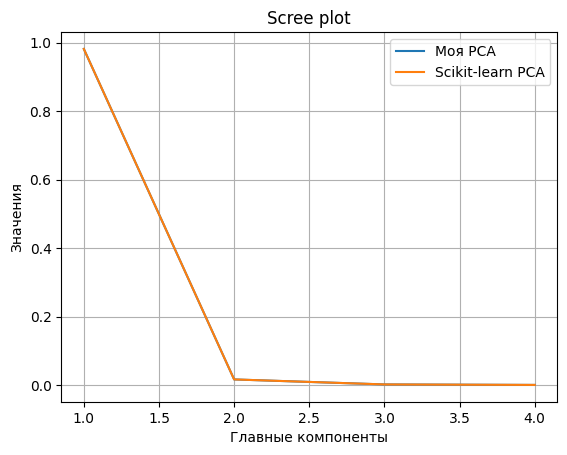

In [55]:
import matplotlib.pyplot as plt

my_pca_explained_variance_ratio = np.var(X_pca, axis=0) / np.var(data, axis=0).sum()
explained_variance_sklearn = pca_sklearn.explained_variance_ratio_
plt.plot(range(1, 5), my_pca_explained_variance_ratio[0:4], label='Моя PCA')
plt.plot(range(1, 5), explained_variance_sklearn[0:4], label='Scikit-learn PCA')
plt.legend()
plt.xlabel('Главные компоненты')
plt.ylabel('Значения')
plt.title('Scree plot')
plt.grid()
plt.show()

Графики прям точь в точь

Оптимальное количество главных компонент - 2?